<a href="https://colab.research.google.com/github/Jaish19/Northern-Command---IITD/blob/main/ammuno_usage_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression - Using Defence dataset

Ammunition Usage Optimization

Scenario: During different missions, ammunition is used at varying rates. The goal is to classify mission types (e.g., short skirmish, long ambush, heavy attack) from ammo usage patterns.

Dataset idea:

Features: ammo_type, rounds_used, duration_of_attack, terrain_type, enemy_strength.

Target: mission_class (skirmish / ambush / full assault).


A skirmish → short duration, fewer rounds, small enemy size.

An ambush → medium duration, sudden heavy fire, moderate enemy strength.

A full assault → long duration, large rounds, big enemy size.

In [4]:
# Install interactive widgets (if not already installed in Colab)
!pip install ipywidgets

#Importing the libraries

In [5]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



#Load & read the dataset

In [6]:
# 2. Read the dataset
df = pd.read_csv("/content/ammo_usage_optimization.csv")
print("Shape of dataset:", df.shape)
print(df.head())



Shape of dataset: (500, 6)
   ammo_type  rounds_used  duration_of_attack terrain_type  enemy_strength  \
0     mortar          200                 201       forest             488   
1  artillery          262                  14       forest             246   
2     bullet          990                 290        urban             328   
3     mortar          937                 246       plains             223   
4     mortar          992                 255       forest             196   

  mission_class  
0  full_assault  
1  full_assault  
2        ambush  
3  full_assault  
4        ambush  


#Basic Data Preprocessing - Encoding the categorical columns + scaling

In [7]:
# 3. Basic preprocessing
# Encode categorical columns
cat_cols = ["ammo_type", "terrain_type", "mission_class"]
encoders = {}
for col in cat_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Features & target
X = df.drop("mission_class", axis=1)
y = df["mission_class"]

# Scale numerical values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#Exploratory Data Analysis

In [15]:
# 4. EDA
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df["mission_class"].value_counts())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ammo_type           500 non-null    int64
 1   rounds_used         500 non-null    int64
 2   duration_of_attack  500 non-null    int64
 3   terrain_type        500 non-null    int64
 4   enemy_strength      500 non-null    int64
 5   mission_class       500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB
None

Class Distribution:
mission_class
0    178
2    176
1    146
Name: count, dtype: int64


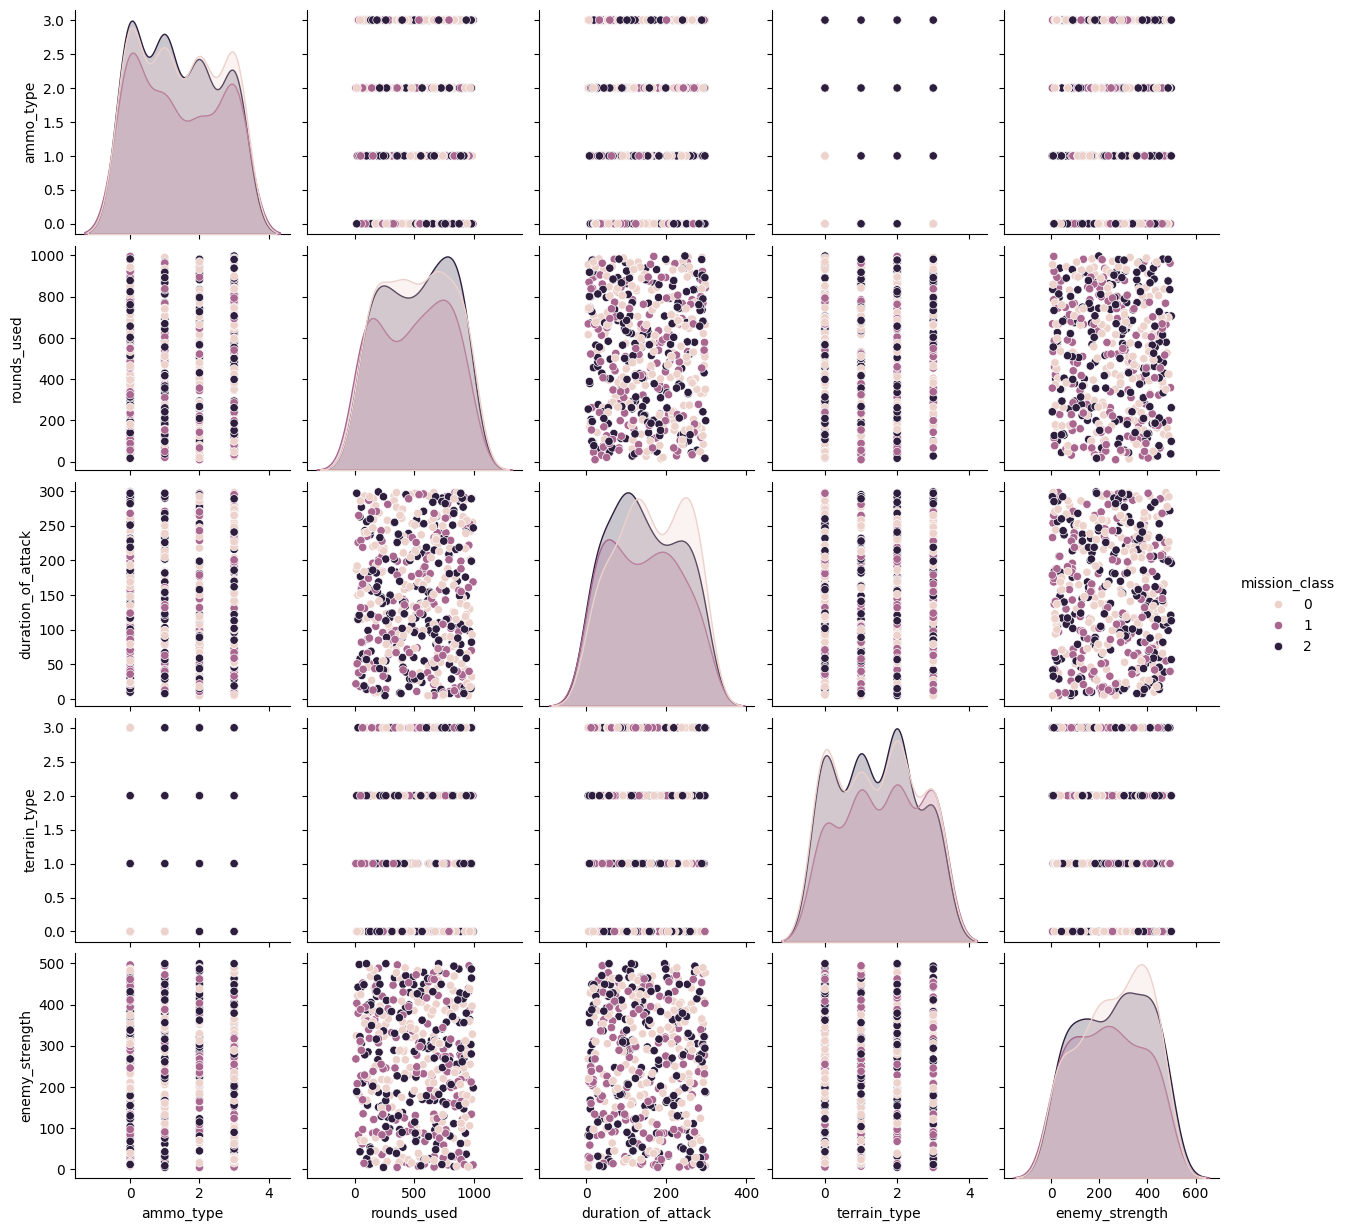

In [16]:
# Pairplot
sns.pairplot(df, hue="mission_class")
plt.show()



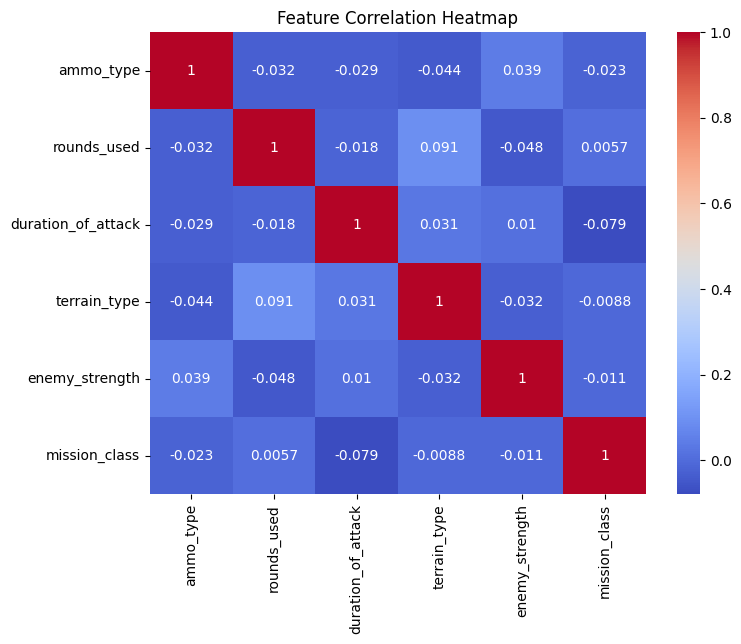

In [17]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Train the logistic regression model with various hyperparameter to find the best parameter

In [9]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Train model with various hyperparameters
solvers = ['lbfgs', 'liblinear', 'saga']
c_values = [0.01, 0.1, 1, 10]

results = []
for solver in solvers:
    for c in c_values:
        model = LogisticRegression(C=c, solver=solver, max_iter=500, multi_class='auto')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((solver, c, acc))

# Show results
print("\nAccuracy results for different hyperparameters:")
for solver, c, acc in results:
    print(f"Solver={solver}, C={c} -> Accuracy={acc:.4f}")




Accuracy results for different hyperparameters:
Solver=lbfgs, C=0.01 -> Accuracy=0.4300
Solver=lbfgs, C=0.1 -> Accuracy=0.4600
Solver=lbfgs, C=1 -> Accuracy=0.4700
Solver=lbfgs, C=10 -> Accuracy=0.4700
Solver=liblinear, C=0.01 -> Accuracy=0.4500
Solver=liblinear, C=0.1 -> Accuracy=0.4500
Solver=liblinear, C=1 -> Accuracy=0.4600
Solver=liblinear, C=10 -> Accuracy=0.4600
Solver=saga, C=0.01 -> Accuracy=0.4300
Solver=saga, C=0.1 -> Accuracy=0.4600
Solver=saga, C=1 -> Accuracy=0.4700
Solver=saga, C=10 -> Accuracy=0.4700


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# Train & Test a model with best parameter

In [18]:
# 7. Pick best model (example: solver='lbfgs', C=1)
best_model = LogisticRegression(C=1, solver='lbfgs', max_iter=500, multi_class='auto')
best_model.fit(X_train, y_train)

# 8. Test the model
y_pred = best_model.predict(X_test)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Evaluate the model with metrics

Classification report

In [ ]:
# 9. Metrics
print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix

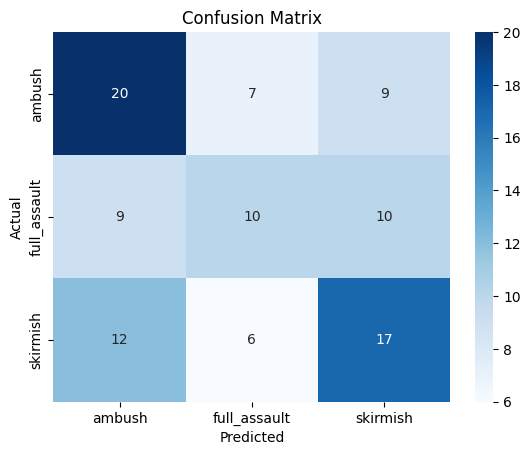

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=encoders["mission_class"].classes_, yticklabels=encoders["mission_class"].classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Manual Prediction Section

In [14]:
# ================================
# Interactive Prediction Section
# ================================
import ipywidgets as widgets
from IPython.display import display

ammo_dropdown = widgets.Dropdown(options=encoders["ammo_type"].classes_.tolist(), description="Ammo Type:")
rounds_slider = widgets.IntSlider(min=10, max=1000, step=10, value=300, description="Rounds:")
duration_slider = widgets.IntSlider(min=5, max=300, step=5, value=60, description="Duration (min):")
terrain_dropdown = widgets.Dropdown(options=encoders["terrain_type"].classes_.tolist(), description="Terrain:")
enemy_slider = widgets.IntSlider(min=5, max=500, step=5, value=100, description="Enemy Strength:")

def predict_mission(ammo_type, rounds_used, duration_of_attack, terrain_type, enemy_strength):
    manual_input = pd.DataFrame([{
        "ammo_type": encoders["ammo_type"].transform([ammo_type])[0],
        "rounds_used": rounds_used,
        "duration_of_attack": duration_of_attack,
        "terrain_type": encoders["terrain_type"].transform([terrain_type])[0],
        "enemy_strength": enemy_strength
    }])
    manual_input_scaled = scaler.transform(manual_input)
    prediction = best_model.predict(manual_input_scaled)
    predicted_class = encoders["mission_class"].inverse_transform(prediction)
    print(f"\n🪖 Predicted Mission Class: {predicted_class[0]}")

ui = widgets.VBox([ammo_dropdown, rounds_slider, duration_slider, terrain_dropdown, enemy_slider])
out = widgets.interactive_output(
    predict_mission,
    {"ammo_type": ammo_dropdown, "rounds_used": rounds_slider, "duration_of_attack": duration_slider, "terrain_type": terrain_dropdown, "enemy_strength": enemy_slider}
)

display(ui, out)


Output()